In [17]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('house_prices_switzerland.csv')

In [19]:
df

,ID,HouseType,Size,Price,LotSize,Balcony,LivingSpace,NumberRooms,YearBuilt,Locality,PostalCode
0,4000745035,SINGLE_HOUSE,L,1249500.0,NaN,True,270.0,7.5,NaN,Genestrerio,6852
1,4000781039,VILLA,M,1389150.0,640.0,True,230.0,8.5,2024.0,Vétroz,1963
2,4000744528,VILLA,L,NaN,NaN,True,880.0,14.0,NaN,Lugano,6900
3,4000744292,MULTIPLE_DWELLING,L,NaN,NaN,True,NaN,NaN,NaN,Grono,6537
4,4000745275,SINGLE_HOUSE,L,NaN,NaN,True,170.0,7.5,NaN,Cadempino,6814
...,...,...,...,...,...,...,...,...,...,...,...
968,4000563553,SINGLE_HOUSE,L,1609650.0,734.0,NaN,230.0,8.5,1996.0,Payerne,1530
969,4000542556,SINGLE_HOUSE,L,1014300.0,601.0,NaN,250.0,11.0,1903.0,Le Locle,2400
970,4000542555,BIFAMILIAR_HOUSE,L,2050650.0,554.0,True,240.0,7.5,2023.0,Les Cullayes,1080
971,4000487294,SINGLE_HOUSE,L,2587200.0,NaN,NaN,510.0,12.5,1993.0,Vacallo,6833


In [20]:
df['HouseType'].unique()

array(['SINGLE_HOUSE', 'VILLA', 'MULTIPLE_DWELLING', 'FARM_HOUSE',
       'CHALET', 'ROW_HOUSE', 'BIFAMILIAR_HOUSE', 'RUSTICO',
       'TERRACE_HOUSE', 'RUSTIC_HOUSE'], dtype=object)

In [21]:
desired_values = ['SINGLE_HOUSE', 'VILLA', 'CHALET', 'ROW_HOUSE', 'BIFAMILIAR_HOUSE']

# Filter the DataFrame to keep only rows with these values in the 'HouseType' column
filtered_df = df[df['HouseType'].isin(desired_values)]

# Display the filtered DataFrame
filtered_df.head()

,ID,HouseType,Size,Price,LotSize,Balcony,LivingSpace,NumberRooms,YearBuilt,Locality,PostalCode
0,4000745035,SINGLE_HOUSE,L,1249500.0,NaN,True,270.0,7.5,NaN,Genestrerio,6852
1,4000781039,VILLA,M,1389150.0,640.0,True,230.0,8.5,2024.0,Vétroz,1963
2,4000744528,VILLA,L,NaN,NaN,True,880.0,14.0,NaN,Lugano,6900
4,4000745275,SINGLE_HOUSE,L,NaN,NaN,True,170.0,7.5,NaN,Cadempino,6814
5,4000148710,SINGLE_HOUSE,S,1102500.0,460.0,True,190.0,7.5,NaN,Glovelier,2855


In [22]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 972
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           864 non-null    int64  
 1   HouseType    864 non-null    object 
 2   Size         864 non-null    object 
 3   Price        808 non-null    float64
 4   LotSize      789 non-null    float64
 5   Balcony      615 non-null    object 
 6   LivingSpace  814 non-null    float64
 7   NumberRooms  847 non-null    float64
 8   YearBuilt    748 non-null    float64
 9   Locality     864 non-null    object 
 10  PostalCode   864 non-null    int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 81.0+ KB


In [23]:
df = filtered_df.dropna(subset=['Price'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 972
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           808 non-null    int64  
 1   HouseType    808 non-null    object 
 2   Size         808 non-null    object 
 3   Price        808 non-null    float64
 4   LotSize      741 non-null    float64
 5   Balcony      566 non-null    object 
 6   LivingSpace  762 non-null    float64
 7   NumberRooms  791 non-null    float64
 8   YearBuilt    704 non-null    float64
 9   Locality     808 non-null    object 
 10  PostalCode   808 non-null    int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 75.8+ KB


In [25]:
numeric_cols = df.select_dtypes(include=['float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing numeric values with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df.info())
print(df.head())

Cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 972
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           808 non-null    int64  
 1   HouseType    808 non-null    object 
 2   Size         808 non-null    object 
 3   Price        808 non-null    float64
 4   LotSize      808 non-null    float64
 5   Balcony      808 non-null    bool   
 6   LivingSpace  808 non-null    float64
 7   NumberRooms  808 non-null    float64
 8   YearBuilt    808 non-null    float64
 9   Locality     808 non-null    object 
 10  PostalCode   808 non-null    int64  
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 70.2+ KB
None
           ID     HouseType Size      Price  LotSize  Balcony  LivingSpace  \
0  4000745035  SINGLE_HOUSE    L  1249500.0    560.0     True        270.0   
1  4000781039         VILLA    M  1389150.0    640.0     True        230.0   
5  4000148710  SING

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_50270/3945909488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_50270/3945909488.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 972
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           808 non-null    int64  
 1   HouseType    808 non-null    object 
 2   Size         808 non-null    object 
 3   Price        808 non-null    float64
 4   LotSize      808 non-null    float64
 5   Balcony      808 non-null    bool   
 6   LivingSpace  808 non-null    float64
 7   NumberRooms  808 non-null    float64
 8   YearBuilt    808 non-null    float64
 9   Locality     808 non-null    object 
 10  PostalCode   808 non-null    int64  
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 70.2+ KB


In [27]:
df1 = filtered_df.dropna()

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 1 to 970
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           454 non-null    int64  
 1   HouseType    454 non-null    object 
 2   Size         454 non-null    object 
 3   Price        454 non-null    float64
 4   LotSize      454 non-null    float64
 5   Balcony      454 non-null    object 
 6   LivingSpace  454 non-null    float64
 7   NumberRooms  454 non-null    float64
 8   YearBuilt    454 non-null    float64
 9   Locality     454 non-null    object 
 10  PostalCode   454 non-null    int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 42.6+ KB


In [29]:
df1

,ID,HouseType,Size,Price,LotSize,Balcony,LivingSpace,NumberRooms,YearBuilt,Locality,PostalCode
1,4000781039,VILLA,M,1389150.0,640.0,True,230.0,8.5,2024.0,Vétroz,1963
11,3003178554,SINGLE_HOUSE,S,1174530.0,876.0,False,210.0,8.5,2023.0,Corban,2826
12,3003181491,SINGLE_HOUSE,L,1764000.0,504.0,False,280.0,9.5,2024.0,Rothenbrunnen,7405
13,4000391531,SINGLE_HOUSE,S,1279630.0,362.0,True,180.0,7.5,2023.0,Biel/Bienne,2500
14,4000391524,SINGLE_HOUSE,S,1301680.0,466.0,True,180.0,8.5,2023.0,Biel/Bienne,2500
...,...,...,...,...,...,...,...,...,...,...,...
960,4000699225,SINGLE_HOUSE,L,1168650.0,715.0,True,300.0,9.5,1929.0,Huttwil,4950
961,4000683171,BIFAMILIAR_HOUSE,L,4336500.0,403.0,True,430.0,8.5,1989.0,Egg b. Zürich,8132
962,4000672443,BIFAMILIAR_HOUSE,L,1543500.0,361.0,True,220.0,8.5,2003.0,Muolen,9313
963,4000666177,SINGLE_HOUSE,L,2168250.0,258.0,True,190.0,8.5,2023.0,Konolfingen,3510


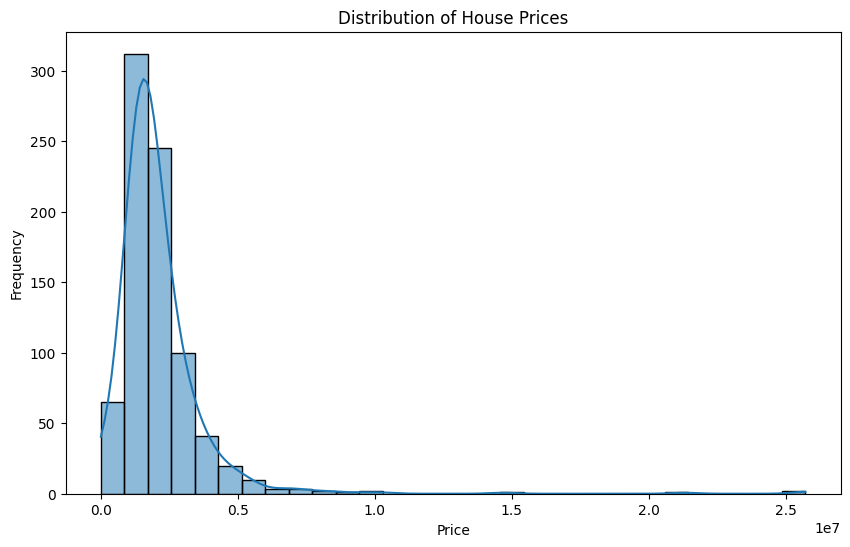

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


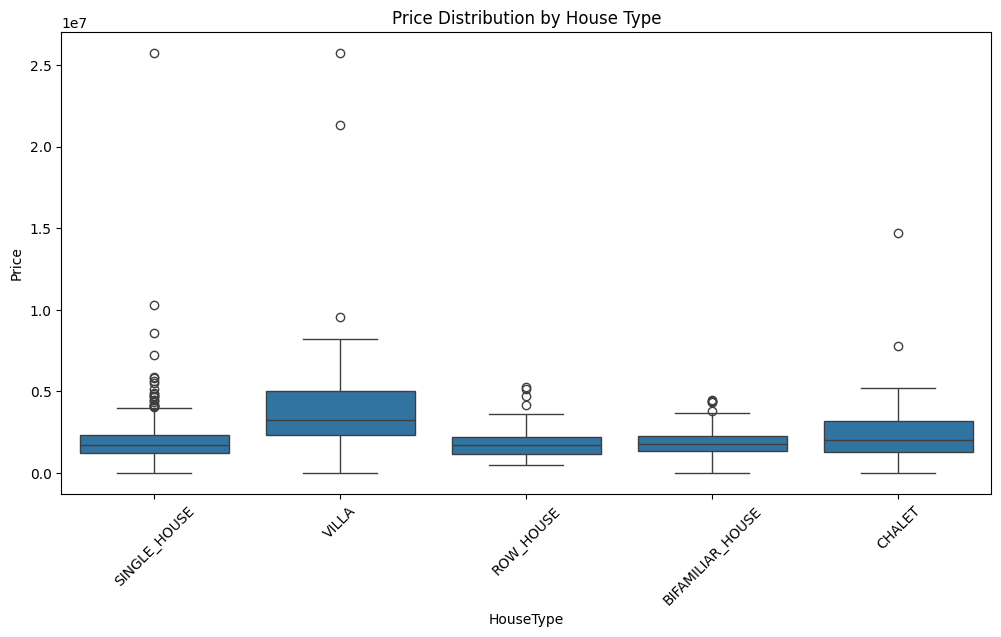

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='HouseType', y='Price', data=df)
plt.title('Price Distribution by House Type')
plt.xticks(rotation=45)
plt.show()


/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_50270/3011635052.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


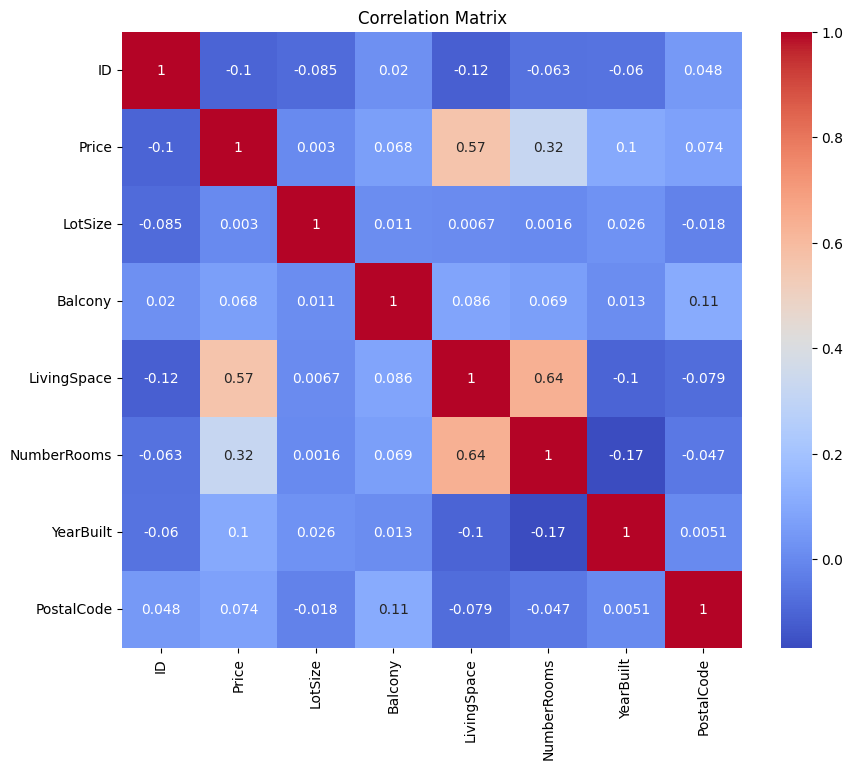

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


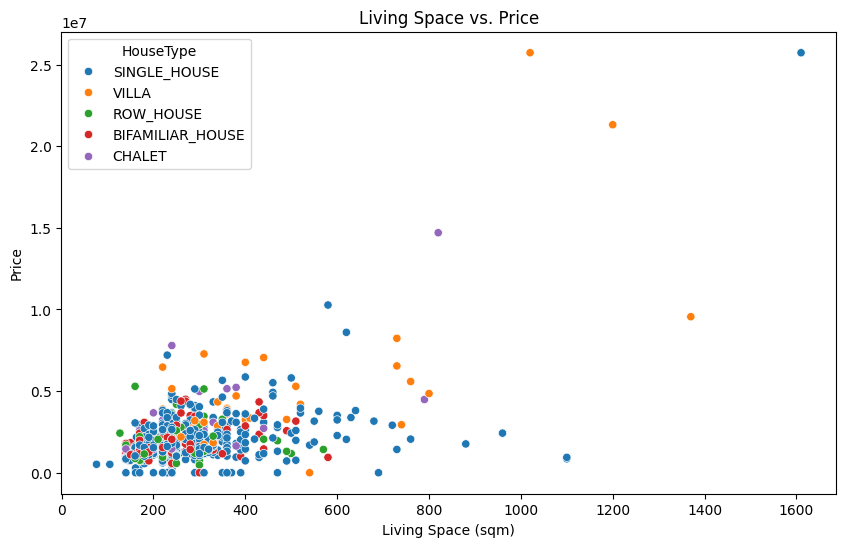

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LivingSpace', y='Price', hue='HouseType', data=df)
plt.title('Living Space vs. Price')
plt.xlabel('Living Space (sqm)')
plt.ylabel('Price')
plt.show()


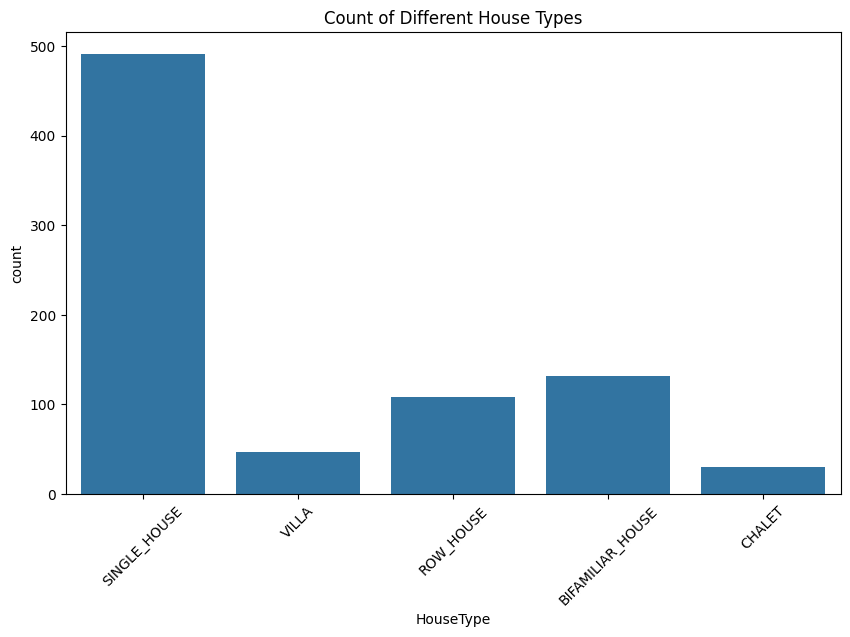

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HouseType', data=df)
plt.title('Count of Different House Types')
plt.xticks(rotation=45)
plt.show()


In [35]:
summary = df.describe()
print("Summary Statistics for Numeric Columns:")
print(summary)


Summary Statistics for Numeric Columns:
                 ID         Price        LotSize  LivingSpace  NumberRooms  \
count  8.080000e+02  8.080000e+02     808.000000   808.000000   808.000000   
mean   3.862476e+09  2.096834e+06    1138.820545   278.727723     9.290223   
std    3.644774e+08  1.886816e+06   12338.403194   140.854491     2.173598   
min    1.093008e+08  0.000000e+00      35.000000    76.000000     3.000000   
25%    4.000382e+09  1.264155e+06     361.000000   200.000000     8.500000   
50%    4.000678e+09  1.756650e+06     560.000000   240.000000     8.500000   
75%    4.000781e+09  2.436525e+06     839.250000   310.000000     9.500000   
max    4.000835e+09  2.572500e+07  350917.000000  1610.000000    23.000000   

         YearBuilt   PostalCode  
count   808.000000   808.000000  
mean   1974.762376  4800.014851  
std      53.898964  2655.916781  
min    1568.000000  1000.000000  
25%    1964.000000  2386.250000  
50%    1987.000000  4428.500000  
75%    2006.000000 

In [37]:
single = df[df['HouseType'] == 'SINGLE_HOUSE']

In [38]:
single

,ID,HouseType,Size,Price,LotSize,Balcony,LivingSpace,NumberRooms,YearBuilt,Locality,PostalCode
0,4000745035,SINGLE_HOUSE,L,1249500.0,560.0,True,270.0,7.5,1987.0,Genestrerio,6852
5,4000148710,SINGLE_HOUSE,S,1102500.0,460.0,True,190.0,7.5,1987.0,Glovelier,2855
6,4000744731,SINGLE_HOUSE,L,1462650.0,560.0,True,250.0,7.5,1987.0,Balerna,6828
9,3000744269,SINGLE_HOUSE,M,1911000.0,378.0,True,350.0,8.5,1987.0,Arosio,6939
10,4000745329,SINGLE_HOUSE,L,1315650.0,560.0,True,160.0,7.5,1987.0,Balerna,6828
...,...,...,...,...,...,...,...,...,...,...,...
966,4000615639,SINGLE_HOUSE,L,0.0,684.0,True,240.0,11.0,1899.0,Steckborn,8266
968,4000563553,SINGLE_HOUSE,L,1609650.0,734.0,True,230.0,8.5,1996.0,Payerne,1530
969,4000542556,SINGLE_HOUSE,L,1014300.0,601.0,True,250.0,11.0,1903.0,Le Locle,2400
971,4000487294,SINGLE_HOUSE,L,2587200.0,560.0,True,510.0,12.5,1993.0,Vacallo,6833


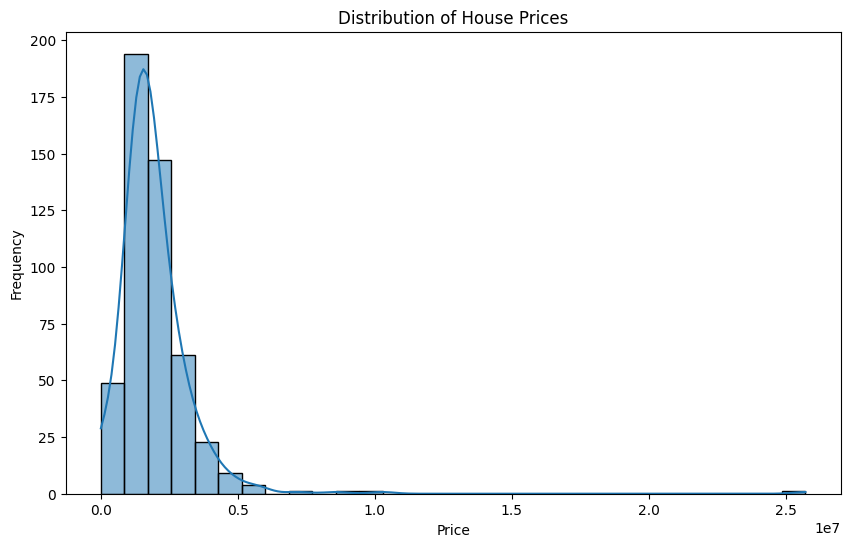

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(single['Price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_50270/2322713969.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(single.corr(), annot=True, cmap='coolwarm')


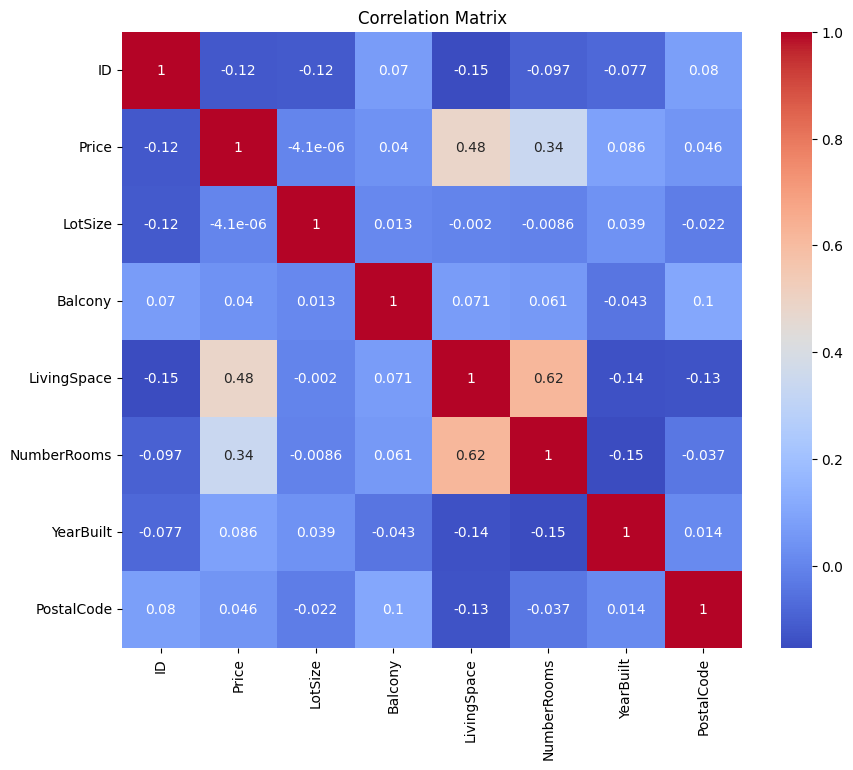

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(single.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


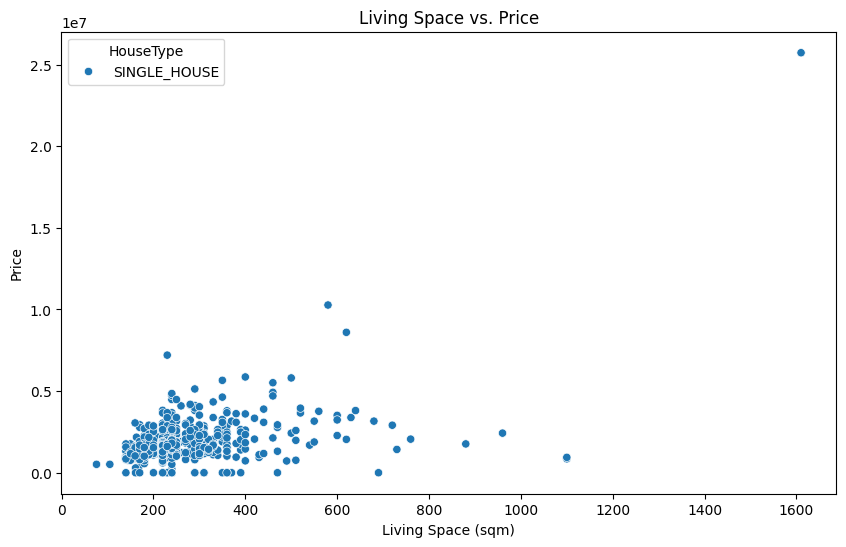

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LivingSpace', y='Price', hue='HouseType', data=single)
plt.title('Living Space vs. Price')
plt.xlabel('Living Space (sqm)')
plt.ylabel('Price')
plt.show()


In [45]:
import pandas as pd

# Assuming the DataFrame is called `df`
# Calculate Q1 and Q3 for the Price column
Q1 = single['Price'].quantile(0.25)
Q3 = single['Price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
single1 = single[(single['Price'] >= lower_bound) & (single['Price'] <= upper_bound)]


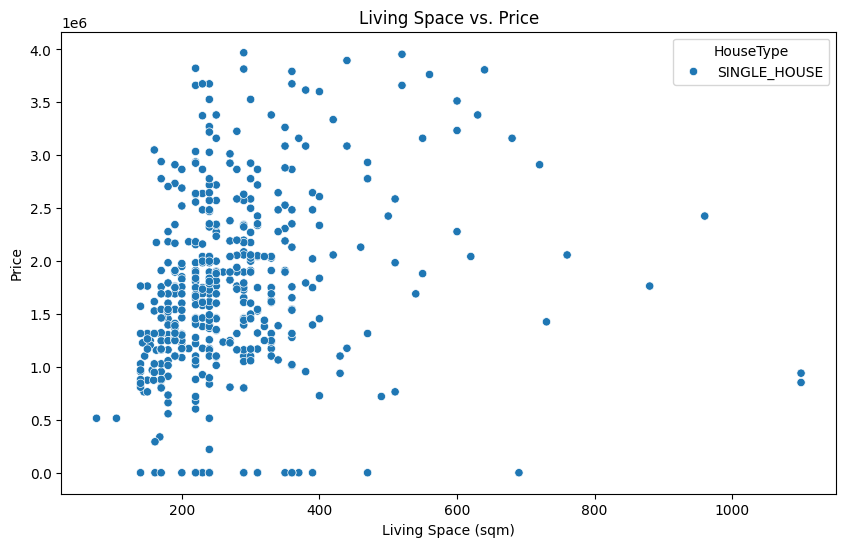

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LivingSpace', y='Price', hue='HouseType', data=single1)
plt.title('Living Space vs. Price')
plt.xlabel('Living Space (sqm)')
plt.ylabel('Price')
plt.show()


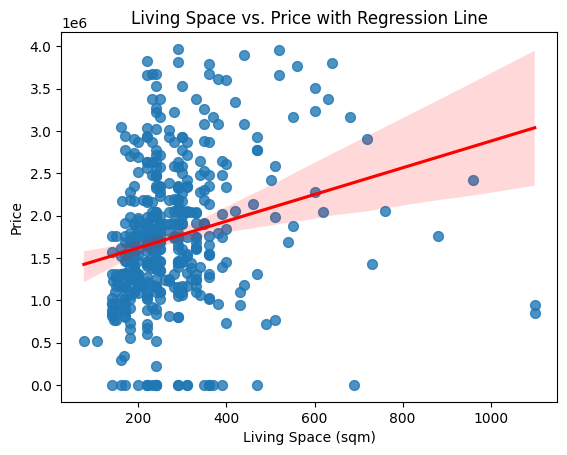

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your DataFrame containing the data
# Replace 'LivingSpace' and 'Price' with the appropriate column names from your data
sns.regplot(x='LivingSpace', y='Price', data=single1, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Set plot labels and title
plt.xlabel("Living Space (sqm)")
plt.ylabel("Price")
plt.title("Living Space vs. Price with Regression Line")

# Display the plot
plt.show()


In [48]:
import pandas as pd

# Assuming the DataFrame is called `df`
# Calculate Q1 and Q3 for the Price column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df2 = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]


In [49]:
df2

,ID,HouseType,Size,Price,LotSize,Balcony,LivingSpace,NumberRooms,YearBuilt,Locality,PostalCode
0,4000745035,SINGLE_HOUSE,L,1249500.0,560.0,True,270.0,7.5,1987.0,Genestrerio,6852
1,4000781039,VILLA,M,1389150.0,640.0,True,230.0,8.5,2024.0,Vétroz,1963
5,4000148710,SINGLE_HOUSE,S,1102500.0,460.0,True,190.0,7.5,1987.0,Glovelier,2855
6,4000744731,SINGLE_HOUSE,L,1462650.0,560.0,True,250.0,7.5,1987.0,Balerna,6828
9,3000744269,SINGLE_HOUSE,M,1911000.0,378.0,True,350.0,8.5,1987.0,Arosio,6939
...,...,...,...,...,...,...,...,...,...,...,...
968,4000563553,SINGLE_HOUSE,L,1609650.0,734.0,True,230.0,8.5,1996.0,Payerne,1530
969,4000542556,SINGLE_HOUSE,L,1014300.0,601.0,True,250.0,11.0,1903.0,Le Locle,2400
970,4000542555,BIFAMILIAR_HOUSE,L,2050650.0,554.0,True,240.0,7.5,2023.0,Les Cullayes,1080
971,4000487294,SINGLE_HOUSE,L,2587200.0,560.0,True,510.0,12.5,1993.0,Vacallo,6833


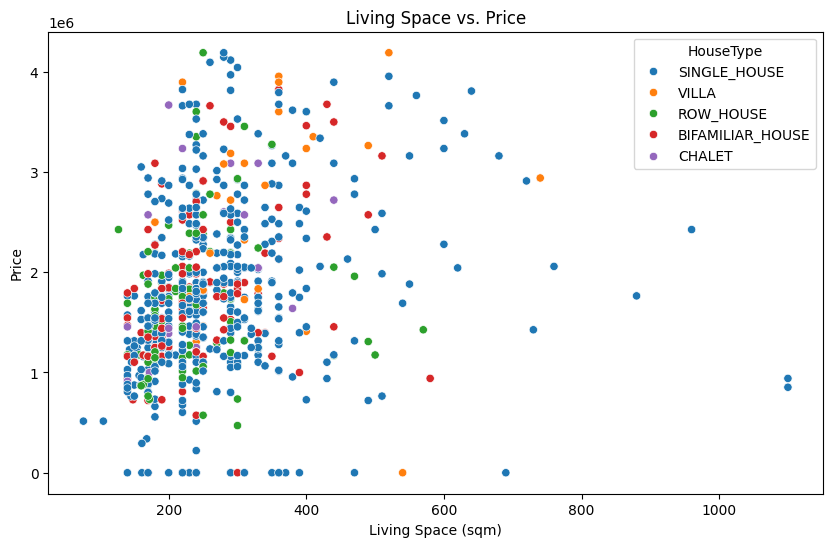

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LivingSpace', y='Price', hue='HouseType', data=df2)
plt.title('Living Space vs. Price')
plt.xlabel('Living Space (sqm)')
plt.ylabel('Price')
plt.show()


In [51]:
df['Locality'].unique()

array(['Genestrerio', 'Vétroz', 'Glovelier', 'Balerna', 'Arosio',
       'Corban', 'Rothenbrunnen', 'Biel/Bienne', 'Burgistein',
       'Seelisberg', 'Sion', 'Laufenburg', 'Abtwil SG', 'Egerkingen',
       'Riken AG', 'Etzgen', 'Spiez', 'Koppigen', 'Les Crosets',
       'Bellmund', 'Claro', 'Aesch BL', 'Riederalp', 'Zuzwil SG',
       'Zullwil', 'Murgenthal', 'Farnern', 'Castagnola', 'Flühli LU',
       'Märstetten', 'Flawil', 'Sevelen', 'Bellwald', 'Düdingen',
       'Allschwil', 'Hofstetten', 'Reinach BL', 'Reinach', 'Langenbruck',
       'Läufelfingen', 'Adligenswil', 'Füllinsdorf', 'Corsier GE',
       'Mendrisio', 'Villars-Sainte-Croix', 'Steinhausen', 'Beromünster',
       'Kriens', 'Chambésy', 'Morgins', 'Schluein', 'Nunningen',
       'Grund b. Gstaad', 'Eschenz', 'Glarus', 'Novazzano', 'Eglisau',
       'Givrins', 'Gelterkinden', 'Pfeffingen', 'Mülligen', 'Weggis',
       'Mühlau', 'Leutwil', 'Obfelden', 'Saxon', 'Vernier',
       'Château-d’Œx', 'Oberwil b. Zug', 'Einsiedeln'

In [52]:
geneva_locations = ['Corsier GE', 'Chambésy', 'Vernier', 'Thônex', 'Vessy', 'Cologny', 
                    'Russin', 'Bernex', 'Hermance', 'Onex', 'Cartigny']

geneva_df = df[df['Locality'].isin(geneva_locations)]

In [54]:
geneva_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 72 to 864
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           12 non-null     int64  
 1   HouseType    12 non-null     object 
 2   Size         12 non-null     object 
 3   Price        12 non-null     float64
 4   LotSize      12 non-null     float64
 5   Balcony      12 non-null     bool   
 6   LivingSpace  12 non-null     float64
 7   NumberRooms  12 non-null     float64
 8   YearBuilt    12 non-null     float64
 9   Locality     12 non-null     object 
 10  PostalCode   12 non-null     int64  
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 1.0+ KB


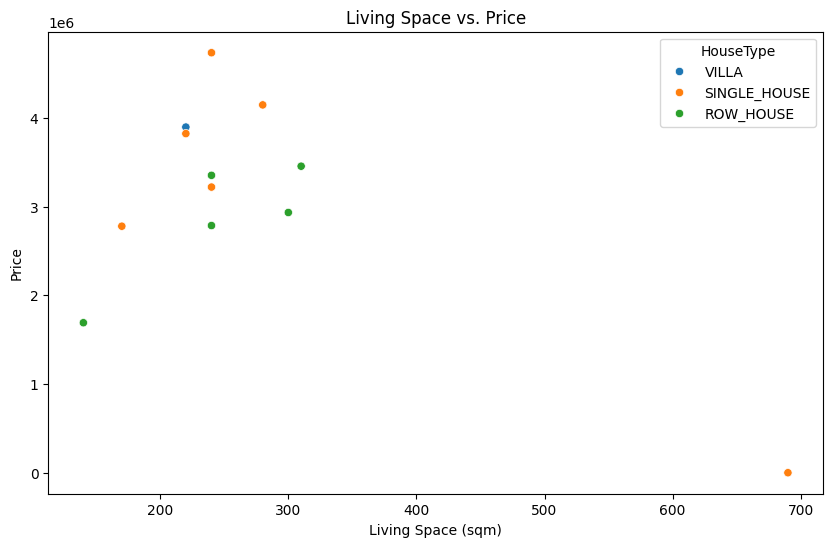

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LivingSpace', y='Price', hue='HouseType', data=geneva_df)
plt.title('Living Space vs. Price')
plt.xlabel('Living Space (sqm)')
plt.ylabel('Price')
plt.show()
